In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from wordcloud import WordCloud
from PIL import Image
import nltk
import re
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


import matplotlib.colors
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/review_data.csv', low_memory=False, index_col=0)

# Drop duplicates and Null Values
df.drop_duplicates(inplace=True)
df.dropna()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


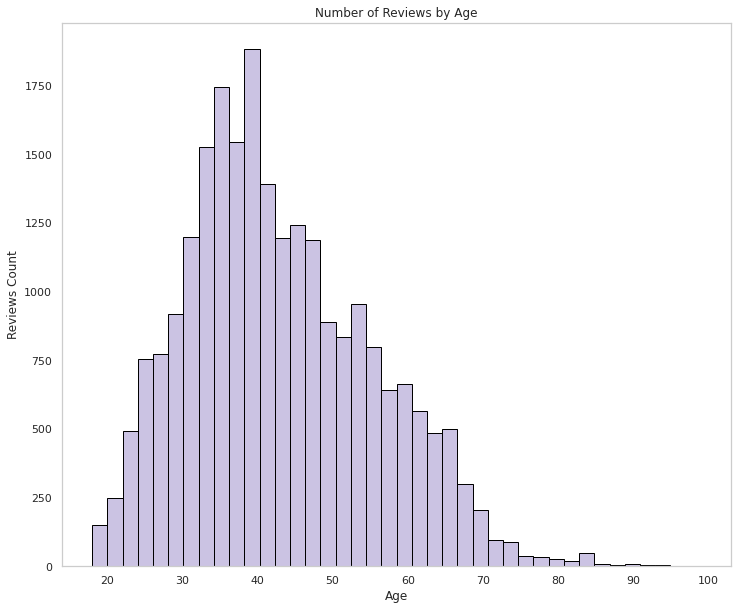

In [13]:
# Age Distribution
plt.figure(figsize=(12,10))
plt.hist(df['Age'], bins=40,color='#CBC3E3',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Reviews Count')
plt.grid(False)
plt.title('Number of Reviews by Age')

plt.show()

In [14]:
# Cloth Recommendation Analysis
df['Recommended IND'].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

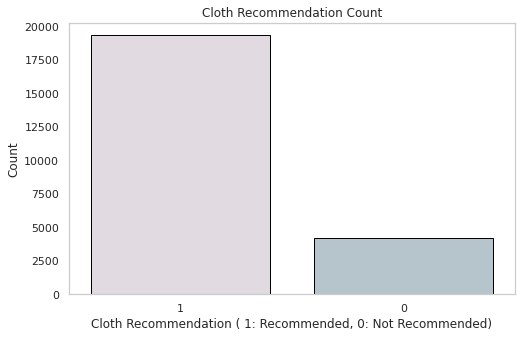

In [15]:
# Cloth Recommendation Count
plt.figure(figsize=(8,5))
sns.countplot(x='Recommended IND',data=df,palette=colors1,order=df['Recommended IND'].value_counts().index,edgecolor='black',linewidth=1)
plt.xlabel('Cloth Recommendation ( 1: Recommended, 0: Not Recommended)')
plt.ylabel('Count')
plt.title('Cloth Recommendation Count')
plt.grid(False)

plt.show()

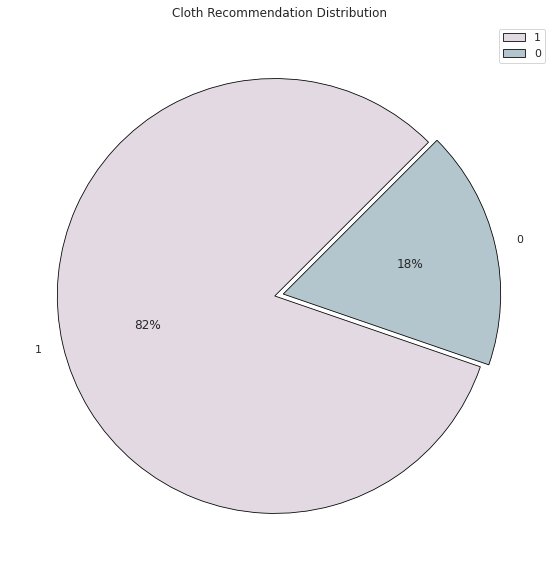

In [16]:
# Recommendation Distribution ( 1 means recommended and 0 means not # Recommended by the Customer)
plt.figure(figsize=(12,10))
plt.pie(x=df['Recommended IND'].value_counts().values,data=df,colors=colors1,labels=df['Recommended IND'].value_counts().index,autopct='%.0f%%',explode=[0.02 for i in df['Recommended IND'].value_counts().index],startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'})
plt.title('Cloth Recommendation Distribution')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

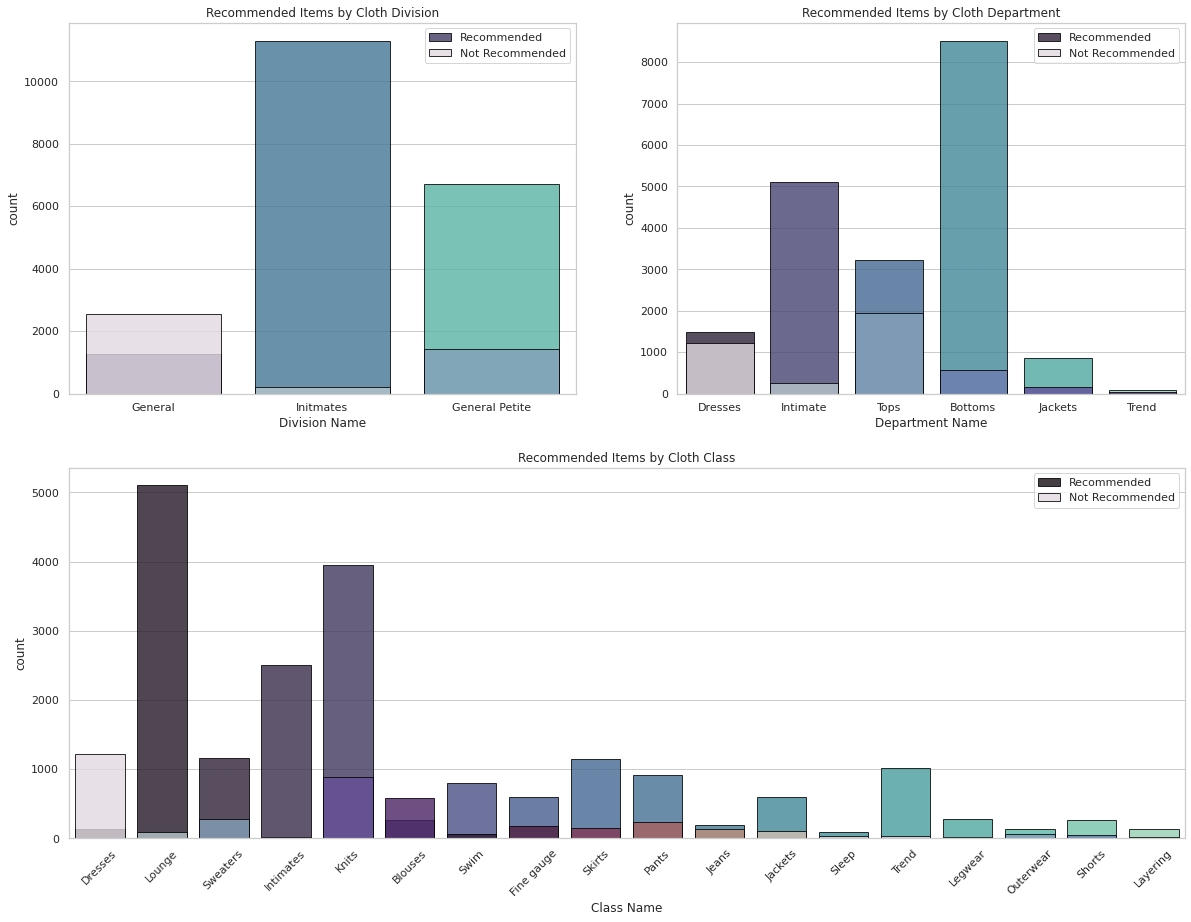

In [17]:
# recommendation Analysis ( 1 means recommended and 0 means not Recommended by the Customer)
r = df[df['Recommended IND']==1]
not_r= df[df['Recommended IND']==0]
# Plot Cloth Recommendation by Cloth Department, Division, Class
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(r['Division Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax1 = sns.countplot(not_r['Division Name'], palette = colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax1 = plt.title("Recommended Items by Cloth Division")
ax1 = plt.legend()
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(r['Department Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax2 = sns.countplot(not_r['Department Name'], palette =colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax2 = plt.title("Recommended Items by Cloth Department")
ax2 = plt.legend()
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(r['Class Name'], palette ='mako', alpha = 0.8, label = "Recommended",edgecolor='black',linewidth=1)
ax3 = sns.countplot(not_r['Class Name'], palette =colors1, alpha = 0.8, label = "Not Recommended",edgecolor='black',linewidth=1)
ax3 = plt.title("Recommended Items by Cloth Class")
ax3 = plt.legend()

plt.show()

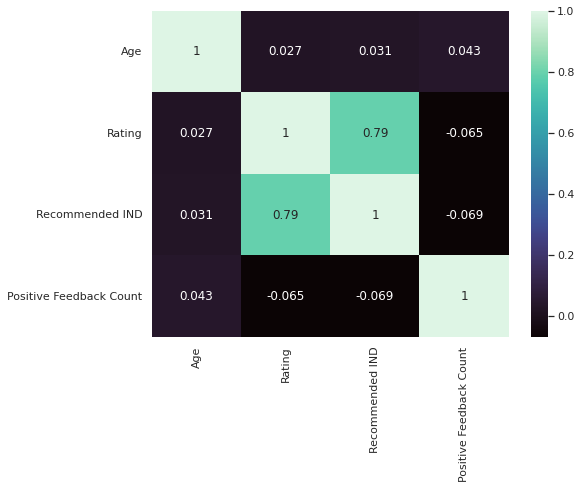

In [18]:
# heatmap
plt.figure(figsize=(8,6))
h = df.drop('Clothing ID',axis=1).corr()
sns.heatmap(h,annot=True,cmap='mako')
plt.show()

In [19]:
# Tokenizing the reviews
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

df['Review Text'] = df['Review Text'].astype(str)
df['Final_Reviews'] = df['Review Text'].apply(tokens)

# Use the Stop words
sw = stopwords.words('english')
clothes =['skirt','pants','white','black','fabric','silky','leather','blouse','sleeve','even','jacket','dress','color','wear','top','sweater','material','shirt','jeans','pant']

def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in sw and word.lower() not in clothes]
    return " ".join(text)

df['Final_Reviews'] = df['Final_Reviews'].apply(stopwords)

# Lemmatize
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()

def lemma(text):
    lem_text = [lm.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

df['Final_Reviews'] = df['Final_Reviews'].apply(lemma)

In [20]:
# Seperating Positive and Negative Reviews
nw = []
pw =[]
pos = df[df['Recommended IND']== 1]
neg = df[df['Recommended IND']== 0]
for r in neg.Final_Reviews:
    nw.append(r)
nw = ' '.join(nw)
for r in pos.Final_Reviews:
    pw.append(r) 
pw = ' '.join(pw)

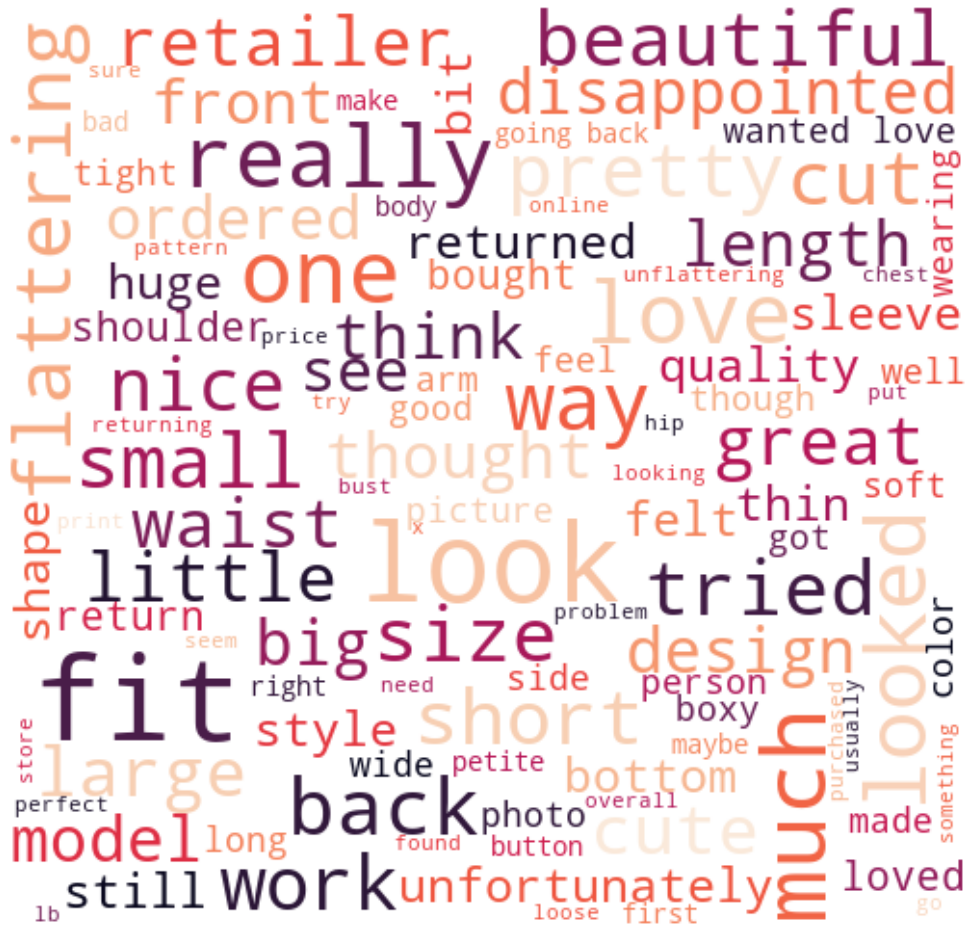

In [21]:
# Wordcloud of Negative Reivews
wordcloud = WordCloud(background_color="white", max_words=len(nw),width=500, height=480, max_font_size=60, min_font_size=10,colormap='rocket')
wordcloud.generate(nw)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

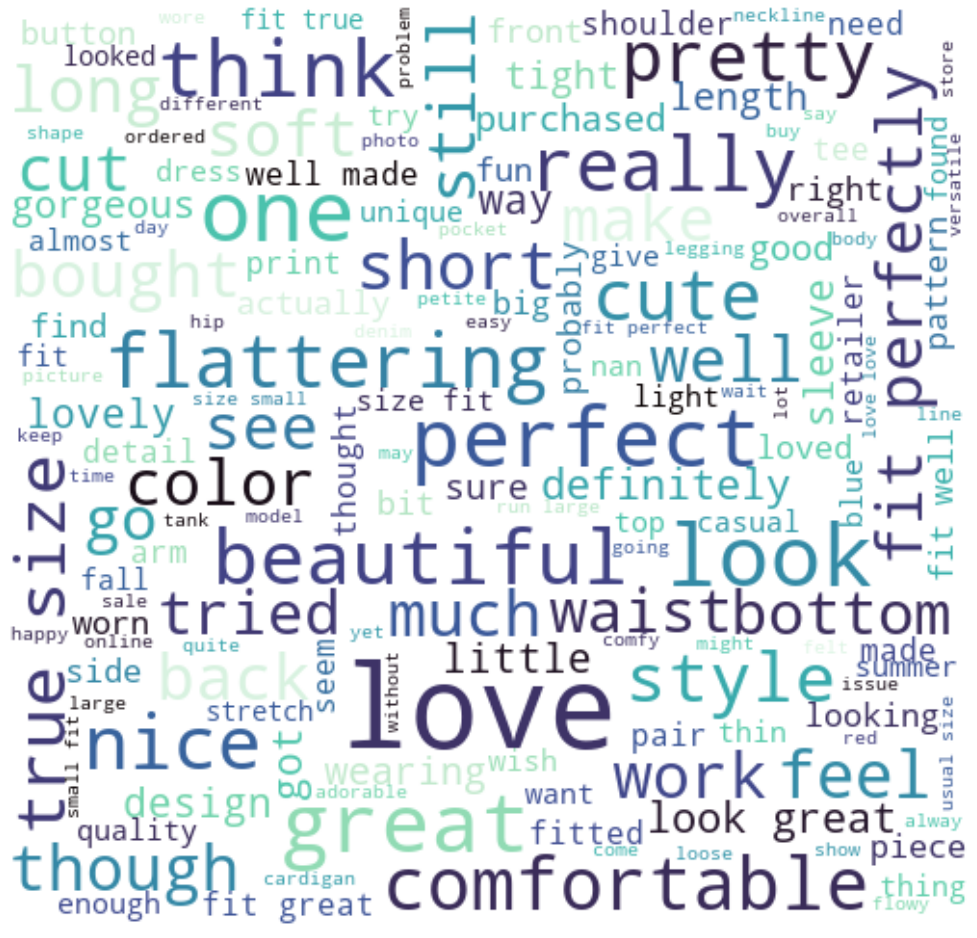

In [22]:
# Word Cloud of positive Reviews
wordcloud = WordCloud(background_color="white", max_words=len(pw),width=500, height=480, max_font_size=60, min_font_size=10,colormap='mako')
wordcloud.generate(pw)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()

In [23]:
# Building Model
X = pos['Final_Reviews']
y = pos['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# Count Vectorizer
v = CountVectorizer(min_df=7, ngram_range=(1,2)).fit(X_train)
X_tv = v.transform(X_train)

### Navie Bayes
These are classification algorithms based on Bayes’ Theorem. They are extremely fast for both training and prediction and provide probabilistic prediction. Multinomial NB is used for discrete counts.

In [30]:
# Naive Bayes
model_nb = Pipeline([('v', CountVectorizer(min_df=7, ngram_range=(1,2))),('tfidf', TfidfTransformer()),('clf',MultinomialNB())])
model_nb.fit(X_train, y_train)
ytest = np.array(y_test)
pred_nb = model_nb.predict(X_test)
print('accuracy %s' % accuracy_score(pred_nb, y_test))
print('Confusion Matrix:',confusion_matrix(y_test, pred_nb))
print(classification_report(ytest, pred_nb))

accuracy 1.0
Confusion Matrix: [[5788]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5788

    accuracy                           1.00      5788
   macro avg       1.00      1.00      1.00      5788
weighted avg       1.00      1.00      1.00      5788



### Random Forest
It’s a supervised machine learning algorithm that is constructed from decision tree algorithms ( it predicts the outcome by taking the average or mean of the output from the different trees) and Is used to solve both regression and classification problems. It mainly used ensemble learning, a technique in which many classifiers are combined together to provide solutions to complex problems. It’s very efficient as it reduces the overfitting of datasets, provides an effective way of handling missing data, runs efficiently on large databases, achieves extremely high accuracies, increases precision and scales really well when new features are added to the dataset.

<div style="text-align:center"><img alt="Random Forest" src="https://github.com/thunderstroke325/60-Days-of-Data-Science-and-ML/blob/main/assets/random_forest_regression.png?raw=true"/></div>

In [29]:
# Random Forest
model_rf = Pipeline([('v', CountVectorizer(min_df=7, ngram_range=(1,2))),('tfidf', TfidfTransformer()),('clf-rf', RandomForestClassifier(n_estimators=30)),])
model_rf.fit(X_train, y_train)
ytest = np.array(y_test)
pred_rf = model_rf.predict(X_test)
print('accuracy %s' % accuracy_score(pred_rf, y_test))
print('Confusion Matrix:', confusion_matrix(y_test, pred_rf))
print(classification_report(ytest, pred_rf))

accuracy 1.0
Confusion Matrix: [[5788]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5788

    accuracy                           1.00      5788
   macro avg       1.00      1.00      1.00      5788
weighted avg       1.00      1.00      1.00      5788

